# Numerical Analysis I - Final Project
Roy Huang \
December 2024

## Detailed Documentation 
<span style="color: red;">(If you just want to play with the code, Run everything then go to user section)</span>

The goal of this project is to compute a two-dimensional integral over a triangle. 

$$ \int \int_T f(x, y) \, dx \, dy $$

Where $T$ is a triangle in the plane. $f(x, y)$ is a function that is given as a set of values at the vertices of the triangle.

One of the simplest ways to evaluate this integral is to use the Lagrange interpolation. The idea is to approximate the function $f(x, y)$ by its linear interpolation over $p(x_i, y_i)$, for $i = 1, 2, 3$.

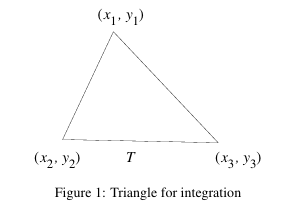

First we need to develop a Lagraange interpolation formula for $p(x, y)$.
$$ p(x, y) = \sum_{i=1}^{3} f(x_i, y_i) L_i(x, y) $$

Where $L_i(x, y)$ are the Lagrange basis polynomials.

$$ L_i(x, y) = 0, \text{if} \, (x, y) \neq (x_i, y_i) $$
$$ L_i(x, y) = 1, \text{if} \, (x, y) = (x_i, y_i) $$


Since we can appproximate $f(x, y)$ by $p(x, y)$, we can approximate the integral over $T$ by the integral over $T$ of $p(x, y)$.
$$ \int \int_T f(x, y) \, dx \, dy \approx \int \int_T p(x, y) \, dx \, dy $$

and 

$$
\int \int_T p(x, y) \, dx \, dy = \frac{1}{3} \sum_{i=1}^{3} p(x_i, y_i) \cdot \text{area}(T)
$$


where 

$$
\text{area}(T) = \frac{1}{2} \left| \det 
\begin{bmatrix}
x_2 - x_1 & y_2 - y_1 \\
x_3 - x_1 & y_3 - y_1
\end{bmatrix}
\right|.
$$



In [124]:
import numpy as np

def area_of_triangle(vertices):
    x1, y1 = vertices[0]
    x2, y2 = vertices[1]
    x3, y3 = vertices[2]
    return 0.5 * np.abs((x2-x1)*(y3-y1) - (x3-x1)*(y2-y1))

def approximate_integral(vertices, f_values):
    area = area_of_triangle(vertices)
    return area * np.mean(f_values)
    


To find the exact integral, we solve it by hand.
For example, let's consider the following function for f(x, y) and the triangle T.

$$ f(x, y) = e^{x + y} $$
$$ T = \{(0, 0), (1, 0), (0, 1)\} $$

The line between (0,0) and (1,0) is $y = 0$ \
The line between (0,0) and (0,1) is $x = 0$ \
The line between (1,0) and (0,1) is $y = x$ 

We can set up the integral as follows:
$$ I  = \int_0^1 \int_0^x e^{x+y} \, dy \, dx$$ 

We solve this by hand and get 
$$I = \frac{e^2 - 2e + 1}{2}$$


In [125]:
# exact integral 
# I = (e^2 - 2e +1)/2
def exact_integral():
    I = (np.exp(2) - 2*np.exp(1) + 1)/2
    return I


In [126]:
# in an example, we have a triangle with vertices (0,0), (1,0), (1,1)
# and a function f(x,y) = exp(x+y)

vertices = [(0,0), (1,0), (1,1)]

def f(x, y):
    return np.exp(x+y)

f_values = [f(x, y) for x, y in vertices]

approx_integral = approximate_integral(vertices, f_values)
true_integral = exact_integral()
error = np.abs(approx_integral - true_integral)

print(f'Approximate integral: {approx_integral}')
print(f'Exact integral: {true_integral}')
print(f'Error: {error}')


Approximate integral: 1.8512229878982824
Exact integral: 1.4762462210062801
Error: 0.3749767668920023


The error in $p(x, y)$ can be estimated to be $O(h^2)$, where $h$ is the maximum distance between the vertices of the triangle.

We can subdivide the triangle into 4 smaller triangles and apply the same procedure to each of them. This will give us a more accurate result. Since the error is $O(h^2)$, the error in the sum of the four triangles should be roughly $2^{-2} = 0.25$ times the error in the original triangle.

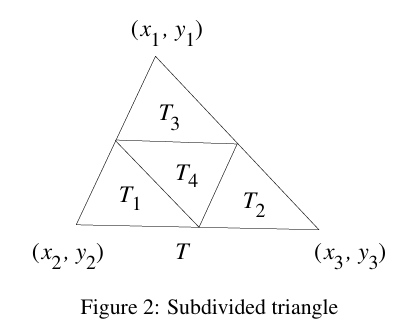

In [127]:
# subdivision of a triangle, then estimate the integral by summing up the integrals of the subtriangles
def subtriangles(vertices):
    x1, y1 = vertices[0]
    x2, y2 = vertices[1]
    x3, y3 = vertices[2]
    m12 = ((x1+x2)/2, (y1+y2)/2)
    m23 = ((x2+x3)/2, (y2+y3)/2)
    m31 = ((x3+x1)/2, (y3+y1)/2)

    t1 = [vertices[0], m12, m31]
    t2 = [m12, vertices[1], m23]
    t3 = [m31, m23, vertices[2]]
    t4 = [m12, m23, m31]

    return [t1, t2, t3, t4]

def approximate_integral_subtriangles(vertices):
    subtriangles_list = subtriangles(vertices)
    integral = 0
    for triangle in subtriangles_list:
        f_values = [f(x, y) for x, y in triangle]
        integral += approximate_integral(triangle, f_values)
    return integral

vertices = [(0,0), (1,0), (1,1)]
approx_integral_sub_1 = approximate_integral_subtriangles(vertices)
true_integral = exact_integral()
error_sub_1 = np.abs(approx_integral_sub_1 - true_integral)

print(f'Approximate integral: {approx_integral_sub_1}')
print(f'Exact integral: {true_integral}')
print(f'Error by subtriangles: {error_sub_1}')
print()
print(f'Error by a single triangle: {error}')
print()
print('Reduction rate:', error_sub_1/error)

Approximate integral: 1.5688922681617254
Exact integral: 1.4762462210062801
Error by subtriangles: 0.09264604715544533

Error by a single triangle: 0.3749767668920023

Reduction rate: 0.24707143304728657


If $S_0$ is the integral over the original triangle, and $S_1$ is the sum of the integrals over the four smaller triangles, and $I$ is the exact integral, then we have
$$ I-S_1 \approx \frac{1}{4} (I-S_0) $$
We can obtain an improved estimate of the integral from $S_0$ and $S_1$:
$$ I \approx S_1 + \frac{1}{3} (S_1 - S_0) $$
We call this new estimate $S_{1}^{(1)}$.

In [128]:
# improved estimation
def improved_estimate(S0, S1):
    return S1 + (S1 - S0)/3

improved_est = improved_estimate(approx_integral, approx_integral_sub_1)
error_improved = np.abs(improved_est - true_integral)
print(f'Improved estimate: {improved_est}')
print(f'Error of improved estimate: {error_improved}')

Improved estimate: 1.4747820282495399
Error of improved estimate: 0.0014641927567402568


We can define a variable $k$, such that the triangle is subdivided into $4^k$ smaller triangles. We can then find $S_k$ and $S_{k-1}$, and use the formula above to find $S_{k}^{(1)}$. 

In [129]:
# a recursive function to estimate the integral of a function over a triangle
# k is the number of subdivisions on each side of the triangle
def integral_triangle(vertices, f, k):
    if k == 0:
        f_values = [f(x, y) for x, y in vertices]
        return approximate_integral(vertices, f_values)
    else:
        subtriangles_list = subtriangles(vertices)
        integral = 0
        for triangle in subtriangles_list:
            integral += integral_triangle(triangle, f, k-1)
        return integral
    
# a function to estimate the imroved integral of a function over a triangle
def integral_triangle_improved(vertices, f, k):
    S0 = integral_triangle(vertices, f, k-1)
    S1 = integral_triangle(vertices, f, k)
    return improved_estimate(S0, S1)

We test the algorithm with $k = 1, 2, 3, 4, 5$ and compare the results with the exact integral.

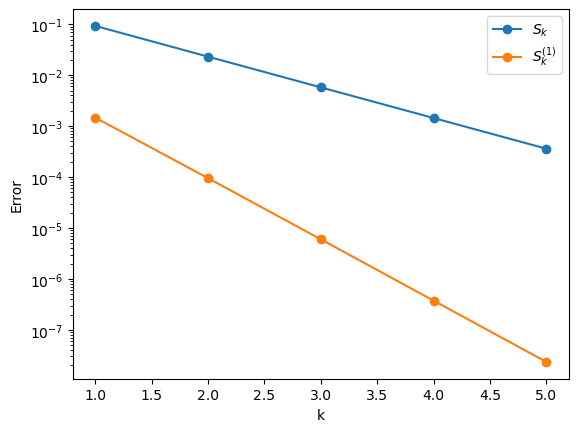

In [130]:
# test the algorithm with k =1,2,3,4,5
# k is from 1 to 5 
k_list = [i for i in range(1, 6)]
S_k = []
S_k1 = []
for k in k_list:
    S_k.append(integral_triangle(vertices, f, k))
    S_k1.append(integral_triangle_improved(vertices, f, k))

errors_k = [np.abs(S - true_integral) for S in S_k]
errors_k1 = [np.abs(S - true_integral) for S in S_k1]

# plot the errors against k
# semi-log plot
import matplotlib.pyplot as plt
plt.semilogy(k_list, errors_k, 'o-', label='$S_k$')
plt.semilogy(k_list, errors_k1, 'o-', label='$S_{k}^{(1)}$')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()



Now we can find a suitable $\alpha$ so that $I - S_k^{(1)} \approx \alpha (I - S_{k-1}^{(1)})$. We can then use this $\alpha$ to find a more accurate estimate of the integral.

In [131]:
# find a alpha such that error_k1[i] = alpha * error_k1[i-1]

alpha = [errors_k1[i]/errors_k1[i-1] for i in range(1, len(errors_k1))]
print(alpha)
alpha_mean = np.mean(alpha)
print(alpha_mean)


[0.06483354243401872, 0.06308181786636075, 0.06264535507540435, 0.06253633251702359]
0.06327426197320185


We can find an improved error estimate by using the formula:
$$ I - S_k^{(1)} \approx \alpha (I - S_{k-1}^{(1)}) $$

We get the following formula: 
$$ I = \frac{S_k^{(1)} - \alpha S_{k-1}^{(1)}}{1 - \alpha} $$

We call this new estimate $S_{k}^{(2)}$.

Improved estimate 2: 1.4762462213018044
Error of improved estimate 2: 2.9552427172063744e-10


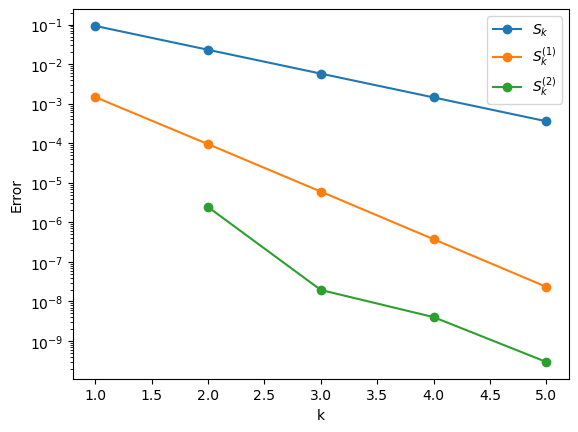

In [132]:
# further improvement 
# I = (S_k1[i] - alpha * S_k1[i-1])/(1-alpha)
def improved_estimate_2(S0, S1, alpha):
    return (S1 - alpha * S0)/(1 - alpha)

improved_est_2 = improved_estimate_2(S_k1[-2], S_k1[-1], alpha_mean)
error_improved_2 = np.abs(improved_est_2 - true_integral)
print(f'Improved estimate 2: {improved_est_2}')
print(f'Error of improved estimate 2: {error_improved_2}')

# further improvement based on the improved estimate 2
S_k2 = []
for i in range(1, len(S_k1)):
    S_k2.append(improved_estimate_2(S_k1[i-1], S_k1[i], alpha_mean))

errors_k2 = [np.abs(S - true_integral) for S in S_k2]

# plot the errors against k
# semi-log plot
plt.semilogy(k_list, errors_k, 'o-', label='$S_k$')
plt.semilogy(k_list, errors_k1, 'o-', label='$S_{k}^{(1)}$')
plt.semilogy(k_list[1:], errors_k2, 'o-', label='$S_{k}^{(2)}$')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()


Let's continue this process and get a better estimate $S_{k}^{(3)}$.

[0.00800166069831758, 0.20615123096939741, 0.07350502914496665]
0.09588597360422722
Improved estimate 3: 1.4762462209067553
Error of improved estimate 3: 9.952483281949753e-11


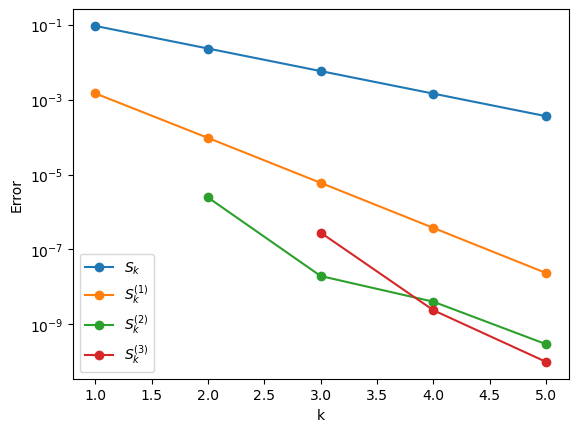

In [133]:
# find beta
beta = [errors_k2[i]/errors_k2[i-1] for i in range(1, len(errors_k2))]
print(beta)
beta_mean = np.mean(beta)
print(beta_mean)

# further improvement based on the improved estimate 2
def improved_estimate_3(S0, S1, beta):
    return (S1 - beta * S0)/(1 - beta)

improved_est_3 = improved_estimate_3(S_k2[-2], S_k2[-1], beta_mean)
error_improved_3 = np.abs(improved_est_3 - true_integral)
print(f'Improved estimate 3: {improved_est_3}')
print(f'Error of improved estimate 3: {error_improved_3}')

# further improvement based on the improved estimate 3
S_k3 = []
for i in range(1, len(S_k2)):
    S_k3.append(improved_estimate_3(S_k2[i-1], S_k2[i], beta_mean))

errors_k3 = [np.abs(S - true_integral) for S in S_k3]

# plot the errors against k
# semi-log plot
plt.semilogy(k_list, errors_k, 'o-', label='$S_k$')
plt.semilogy(k_list, errors_k1, 'o-', label='$S_{k}^{(1)}$')
plt.semilogy(k_list[1:], errors_k2, 'o-', label='$S_{k}^{(2)}$')
plt.semilogy(k_list[2:], errors_k3, 'o-', label='$S_{k}^{(3)}$')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()


## User Section

### Basic Method $S_k$

Time elapsed: 54.797337770462036
The smallest k such that error_k < threshold: 11


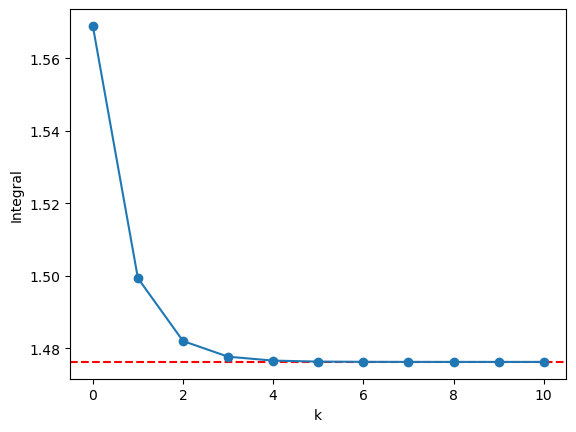

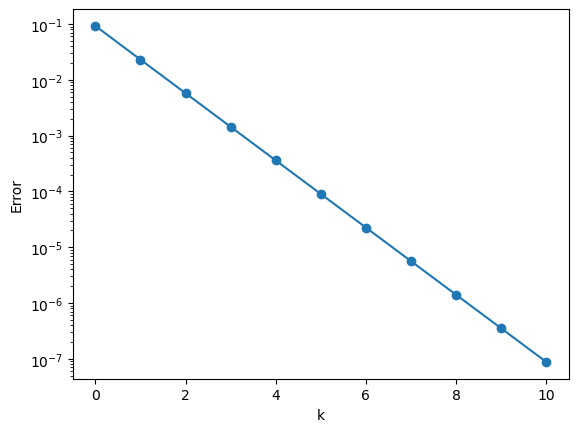

In [138]:
import time
# choose a threshold for the error
# triangle vertices are set to be (0,0), (1,0), (1,1)
# function are set to be f(x,y) = exp(x+y)
threshold = 1e-7

# find the smallest k such that error_k < threshold
def find_k(vertices, f, threshold):
    start_time = time.time()
    k = 1
    integrals =[]
    errors = []
    while True:
        # use the basic estimation
        integral = integral_triangle(vertices, f, k)
        integrals.append(integral)
        error = np.abs(integral - true_integral)
        errors.append(error)
        if error < threshold:
            break
        k += 1
    end_time = time.time()
    print(f'Time elapsed: {end_time - start_time}')
    return k, errors, integrals
    
k, errors, integrals = find_k(vertices, f, threshold)
print(f'The smallest k such that error_k < threshold: {k}')

# plot the integrals against k
# show the true integral as a horizontal dashed line
plt.axhline(y=true_integral, color='r', linestyle='--')
plt.plot(integrals, 'o-')
plt.xlabel('k')
plt.ylabel('Integral')
plt.show()

# plot the errors against k
plt.semilogy(errors, 'o-')
plt.xlabel('k')
plt.ylabel('Error')
plt.show()



### Improved Method $S_{k}^{(1)}$

Time elapsed: 0.024504661560058594
The smallest k such that error_k < threshold: 5


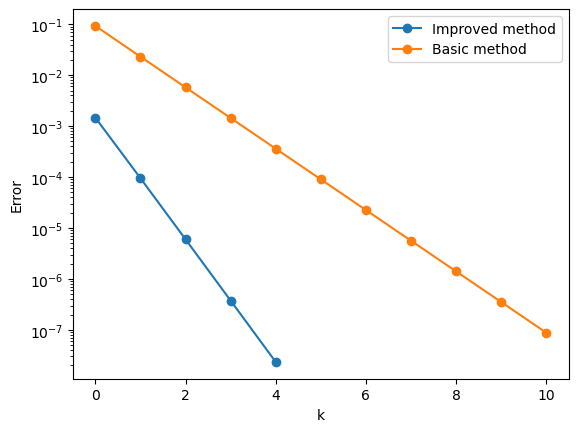

In [139]:
# using the improved estimation
def find_k_improved(vertices, f, threshold):
    start_time = time.time()
    k = 1
    integrals =[]
    errors = []
    while True:
        # use the improved estimation
        integral = integral_triangle_improved(vertices, f, k)
        integrals.append(integral)
        error = np.abs(integral - true_integral)
        errors.append(error)
        if error < threshold:
            break
        k += 1
    end_time = time.time()
    print(f'Time elapsed: {end_time - start_time}')
    return k, errors, integrals

k_improved, errors_improved, integrals_improved = find_k_improved(vertices, f, threshold)
print(f'The smallest k such that error_k < threshold: {k_improved}')

# plot the errors against k
# show the basic method errors as well
plt.semilogy(errors_improved, 'o-', label='Improved method')
plt.semilogy(errors, 'o-', label='Basic method')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()

### Further Improved Method $S_{k}^{(2)}$

Time elapsed: 0.0020766258239746094
The smallest k such that error_k < threshold: 3


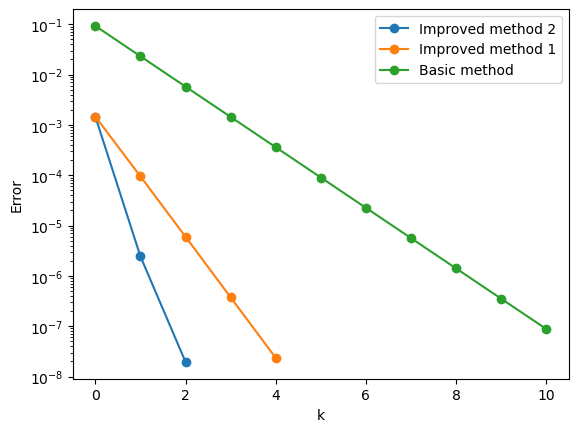

In [140]:
# further improvement S_k2
def find_k_improved_2(vertices, f, threshold):
    start_time = time.time()
    k = 1
    integrals =[]
    errors = []
    while True:
        # use the improved estimation
        integral = integral_triangle_improved(vertices, f, k)
        integrals.append(integral)
        # now use improved estimate 2
        if k > 1:
            integral_improved = improved_estimate_2(integrals[-2], integral, alpha_mean)
            error = np.abs(integral_improved - true_integral)
        else:
            error = np.abs(integral - true_integral)
        errors.append(error)
        if error < threshold:
            break

        k += 1
    end_time = time.time()
    print(f'Time elapsed: {end_time - start_time}')
    return k, errors, integrals

k_improved_2, errors_improved_2, integrals_improved_2 = find_k_improved_2(vertices, f, threshold)
print(f'The smallest k such that error_k < threshold: {k_improved_2}')

# plot the errors against k
# show the basic method errors 
# show the improved method errors
plt.semilogy(errors_improved_2, 'o-', label='Improved method 2')
plt.semilogy(errors_improved, 'o-', label='Improved method 1')
plt.semilogy(errors, 'o-', label='Basic method')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()

### Even Further Improved Method $S_{k}^{(3)}$

Time elapsed: 0.0045130252838134766
The smallest k such that error_k < threshold: 4


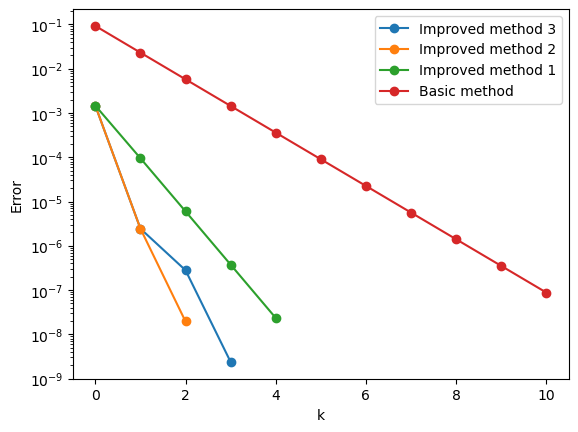

In [141]:
# further improvement S_k3
def find_k_improved_3(vertices, f, threshold):
    start_time = time.time()
    k = 1
    integrals =[]
    improved_estimates = []
    errors = []
    while True:
        # use the improved estimation
        integral = integral_triangle_improved(vertices, f, k)
        integrals.append(integral)
        # now use improved estimate 2 to find S_k2
        if k > 1:
            integral_improved_2 = improved_estimate_2(integrals[-2], integral, alpha_mean)
            # add S_k2 to the list
            improved_estimates.append(integral_improved_2)
            # now use improved estimate 3
            if k > 2:
                integral_improved_3 = improved_estimate_3(improved_estimates[-2], integral_improved_2, beta_mean)
                error = np.abs(integral_improved_3 - true_integral)
            else:
                error = np.abs(integral_improved_2 - true_integral)
        else:
            error = np.abs(integral - true_integral)
        errors.append(error)
        if error < threshold:
            break

        k += 1
    end_time = time.time()
    print(f'Time elapsed: {end_time - start_time}')
    return k, errors, integrals

k_improved_3, errors_improved_3, integrals_improved_3 = find_k_improved_3(vertices, f, threshold)
print(f'The smallest k such that error_k < threshold: {k_improved_3}')

# plot the errors against k
# show the basic method errors
# show the improved method errors
# show the further improved method errors
plt.semilogy(errors_improved_3, 'o-', label='Improved method 3')
plt.semilogy(errors_improved_2, 'o-', label='Improved method 2')
plt.semilogy(errors_improved, 'o-', label='Improved method 1')
plt.semilogy(errors, 'o-', label='Basic method')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()